In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
X=pd.read_csv('car data.csv')

In [3]:
X.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
X.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
X.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
X.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### EDA:

* FOLLOWING GRAPHS SHOWS THE RELATIONSHIP BETWEEN DIFFERENT PARAMETERS (BETWEEN EACH NUMERICAL VALUE BASED PARAMETERS): 

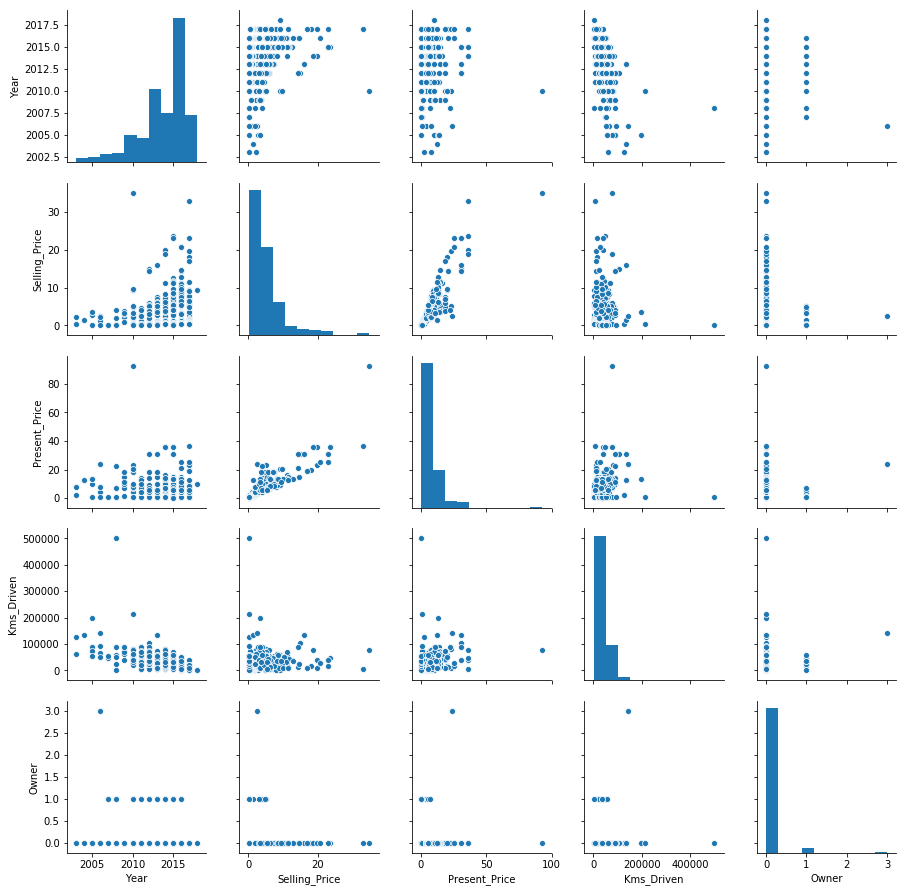

In [7]:
sns.pairplot(X)
plt.show()

*  From  Plot Below We can Figure out that there's a Linear Relationship Beetween Selling And Present Price:

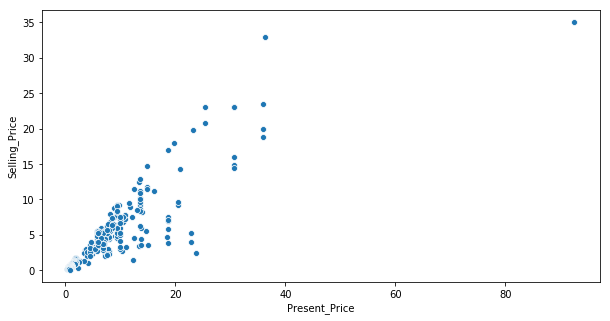

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(X['Present_Price'],X['Selling_Price'])
plt.show()

* Plot between selling price and kms driven signifies most of vehicels are in the range of 0-100000kms with variying prices:  

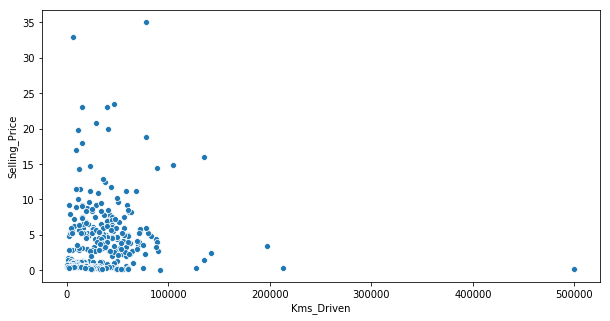

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(X['Kms_Driven'],X['Selling_Price'])
plt.show()

* Selling Price VS Year Shows Trend in Selling Price as the Year goes by its high for more recent Vehicel Models: 

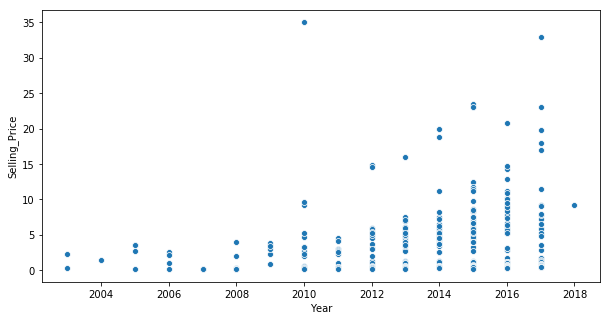

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(X['Year'],X['Selling_Price'])
plt.show()

* GRAPHS BELOW PROVIDES SELLING PRICE BASED ON DIFFERENT CLASS OF PARAMETERS :

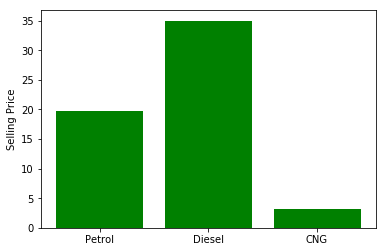

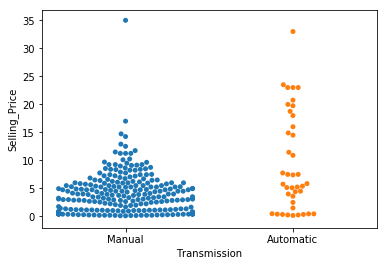

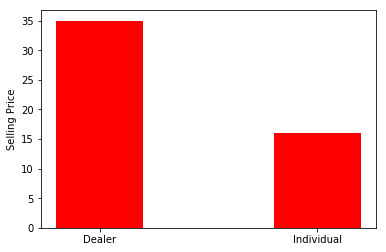

In [11]:
plt.bar(X['Fuel_Type'],X['Selling_Price'],color='g',width=0.8)
plt.ylabel('Selling Price')
plt.show()

sns.swarmplot(X['Transmission'],X['Selling_Price'])
plt.show()

plt.bar(X['Seller_Type'],X['Selling_Price'],color='r',width=0.4)
plt.ylabel('Selling Price')
plt.show()

* NO.OF VHICELS BASED ON FUEL TYPE:

In [12]:
Z=X['Fuel_Type'].value_counts()
Z

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

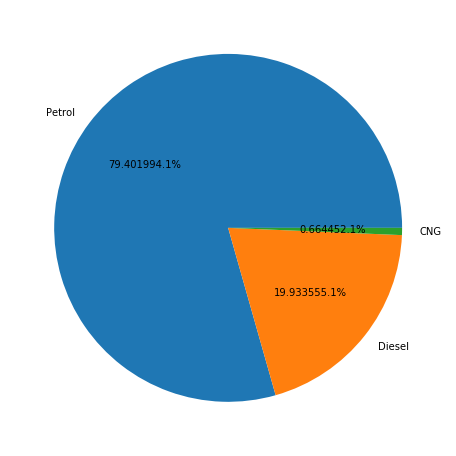

In [13]:
plt.figure(figsize=(10,8))
plt.pie(Z,labels=Z.index,autopct='%f.1%%')
plt.show()

* AVERAGE KMS DRIVEN BY VEHICELS BASED ON THEIR FUEL TYPE :

In [20]:
X['Kms_Driven'].groupby(X['Fuel_Type']).mean()

Fuel_Type
CNG       42749.000000
Diesel    50369.916667
Petrol    33528.937238
Name: Kms_Driven, dtype: float64

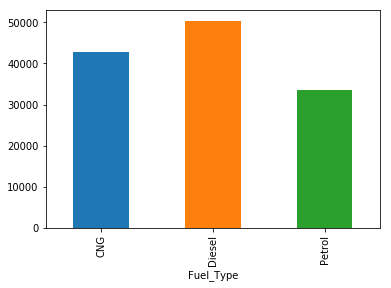

In [21]:
X['Kms_Driven'].groupby(X['Fuel_Type']).mean().plot(kind='bar')
plt.show()

* Number of vehicels availabel based on Transsmission Type:

In [24]:
Z1=X['Transmission'].value_counts()
Z1

Manual       261
Automatic     40
Name: Transmission, dtype: int64

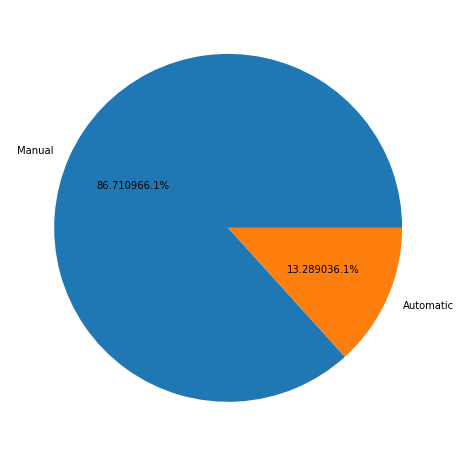

In [25]:
plt.figure(figsize=(10,8))
plt.pie(Z1,labels=Z1.index,autopct='%f.1%%')
plt.show()

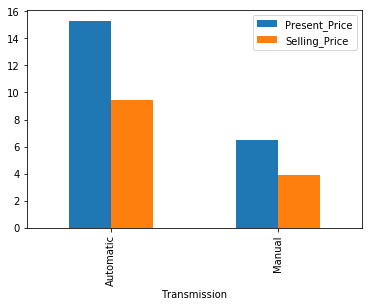

In [27]:
X[['Present_Price','Selling_Price']].groupby(X['Transmission']).mean().plot(kind='bar')
plt.show()

* Average Vechicel Kms Driven According to Transsmission Type: 

In [28]:
X['Kms_Driven'].groupby(X['Transmission']).mean()

Transmission
Automatic    53062.975000
Manual       34477.356322
Name: Kms_Driven, dtype: float64

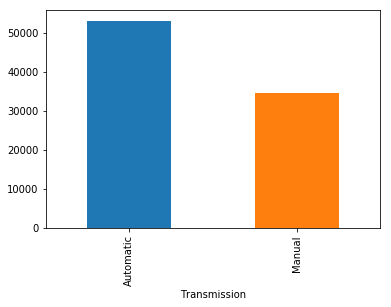

In [29]:
X['Kms_Driven'].groupby(X['Transmission']).mean().plot(kind='bar')
plt.show()

* NUMBER OF SELLERS PRESENT FOR VEHICELS:

In [34]:
Z2=X['Seller_Type'].value_counts()
Z2

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

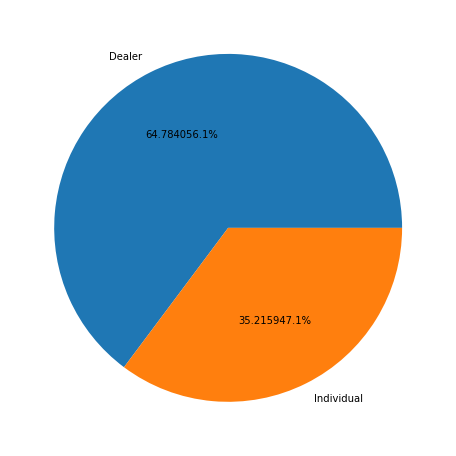

In [35]:
plt.figure(figsize=(10,8))
plt.pie(Z2,labels=Z2.index,autopct='%f.1%%')
plt.show()

* AVERAGE PRICING BASED DEALER TYPE:

In [36]:
X[['Present_Price','Selling_Price']].groupby(X['Seller_Type']).mean()

,Present_Price,Selling_Price
Seller_Type,,
Dealer,10.886308,6.721692
Individual,1.635283,0.870943


* AVERAGE KMS DRIVINE BY VEHICEL BASED ON DEALEAR TYPE YOU CHOOSE:

In [37]:
X['Kms_Driven'].groupby(X['Seller_Type']).mean()

Seller_Type
Dealer        39850.133333
Individual    31606.915094
Name: Kms_Driven, dtype: float64

####  VEHICELS AVILABEL AT HIGHER PRICES:

In [39]:
X1=X[['Selling_Price','Car_Name','Kms_Driven']].sort_values(ascending=False,by='Selling_Price').head(10)
X1

,Selling_Price,Car_Name,Kms_Driven
86,35.00,land cruiser,78000
64,33.00,fortuner,6000
63,23.50,fortuner,47000
82,23.00,innova,15000
51,23.00,fortuner,40000
93,23.00,fortuner,40000
96,20.75,innova,29000
59,19.99,fortuner,41000
66,19.75,innova,11000
62,18.75,fortuner,78000


####  VEHICELS AVILABEL AT LOWER PRICES:

In [40]:
X[['Selling_Price','Car_Name','Kms_Driven']].sort_values(ascending=False,by='Selling_Price').tail(10)

,Selling_Price,Car_Name,Kms_Driven
194,0.20,Hero CBZ Xtreme,50000
190,0.20,Bajaj Pulsar 150,60000
189,0.20,Hero Super Splendor,55000
192,0.20,Hero Hunk,49000
195,0.18,Bajaj ct 100,35000
196,0.17,Activa 3g,500000
197,0.16,Honda CB twister,33000
198,0.15,Bajaj Discover 125,35000
199,0.12,Honda CB Shine,53000
200,0.10,Bajaj Pulsar 150,92233


#### (PETROL) VEHICELS AVILABEL AT HIGHER PRICES:

In [41]:
X[X['Fuel_Type']=='Petrol'][['Selling_Price','Car_Name','Kms_Driven','Fuel_Type']].sort_values(ascending=False,by='Selling_Price').head(10)

,Selling_Price,Car_Name,Kms_Driven,Fuel_Type
66,19.75,innova,11000,Petrol
97,17.00,corolla altis,8700,Petrol
69,14.25,corolla altis,12000,Petrol
232,11.45,elantra,12900,Petrol
212,11.25,creta,22671,Petrol
275,10.90,city,30753,Petrol
256,10.25,city,49562,Petrol
289,10.11,city,10980,Petrol
277,9.70,city,21780,Petrol
231,9.25,verna,15001,Petrol


#### (DIESEL)  VEHICELS AVILABEL AT HIGHER PRICES:

In [42]:
X[X['Fuel_Type']=='Diesel'][['Selling_Price','Car_Name','Kms_Driven','Fuel_Type']].sort_values(ascending=False,by='Selling_Price').head(10)

,Selling_Price,Car_Name,Kms_Driven,Fuel_Type
86,35.00,land cruiser,78000,Diesel
64,33.00,fortuner,6000,Diesel
63,23.50,fortuner,47000,Diesel
82,23.00,innova,15000,Diesel
93,23.00,fortuner,40000,Diesel
51,23.00,fortuner,40000,Diesel
96,20.75,innova,29000,Diesel
59,19.99,fortuner,41000,Diesel
62,18.75,fortuner,78000,Diesel
52,18.00,innova,15000,Diesel


#### (CNG)  VEHICELS AVILABEL:

In [43]:
X[X['Fuel_Type']=='CNG'][['Selling_Price','Car_Name','Kms_Driven','Fuel_Type']].sort_values(ascending=False,by='Selling_Price').head(10)

,Selling_Price,Car_Name,Kms_Driven,Fuel_Type
18,3.25,wagon r,35500,CNG
35,2.95,sx4,49998,CNG


####   VEHICELS AVILABEL IN NEW MODEL BASED ON YEAR:

In [44]:
X[['Selling_Price','Car_Name','Kms_Driven','Fuel_Type','Year']].sort_values(ascending=False,by='Year').head(10)

,Selling_Price,Car_Name,Kms_Driven,Fuel_Type,Year
5,9.25,vitara brezza,2071,Diesel,2018
208,7.90,i20,3435,Petrol,2017
52,18.00,innova,15000,Diesel,2017
129,0.78,Yamaha FZ S V 2.0,5000,Petrol,2017
128,0.80,Honda CB Hornet 160R,3000,Petrol,2017
231,9.25,verna,15001,Petrol,2017
27,6.00,swift,16200,Petrol,2017
126,0.90,Bajaj Avenger 220,1300,Petrol,2017
265,6.50,jazz,21200,Petrol,2017
220,3.50,eon,38488,Petrol,2017


####  VEHICELS AVILABEL FOR OLD MODEL BASED ON YEAR:

In [45]:
X[['Selling_Price','Car_Name','Kms_Driven','Fuel_Type','Year']].sort_values(ascending=False,by='Year').tail(10)

,Selling_Price,Car_Name,Kms_Driven,Fuel_Type,Year
200,0.10,Bajaj Pulsar 150,92233,Petrol,2006
47,1.05,wagon r,65000,Petrol,2006
85,2.50,camry,142000,Petrol,2006
84,3.49,innova,197176,Diesel,2005
189,0.20,Hero Super Splendor,55000,Petrol,2005
92,3.51,innova,75000,Petrol,2005
54,2.75,innova,90000,Petrol,2005
77,1.50,corolla,135154,Petrol,2004
39,2.25,sx4,62000,Petrol,2003
37,0.35,800,127000,Petrol,2003


## 4. BULDING MODEL: 

* CONVERTING DATATYPE INTO APPPLICABEL FORMAT :


In [47]:
X.loc[X['Fuel_Type']=='Petrol','Fuel_Type']=0
X.loc[X['Fuel_Type']=='Diesel','Fuel_Type']=1
X.loc[X['Fuel_Type']=='CNG','Fuel_Type']=2

In [48]:
X.loc[X['Seller_Type']=='Dealer','Seller_Type']=0
X.loc[X['Seller_Type']=='Individual','Seller_Type']=1

In [49]:
X.loc[X['Transmission']=='Manual','Transmission']=0
X.loc[X['Transmission']=='Automatic','Transmission']=1

In [50]:
X.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


* ASSIGNING FEATURE AND TARGET VARIABEL VALUES:

In [72]:
x=X.iloc[:].drop(columns=['Selling_Price','Car_Name']).values
y=X[['Selling_Price']].values

* SPLITING THE VALUES FOR TRAINING TESTING PURPOSE:

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=0)

* IMPLEMENTING THE ALGORITHM:

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
reg=LinearRegression()

In [56]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
Y_pred=reg.predict(X_test)

* EVALUTION OF THE MODLE :

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2_score(Y_test,Y_pred)

0.861974543536927

* BULDING OLS SUMMARY:

In [60]:
import statsmodels.api as sm

In [61]:
x1=X.iloc[:].drop(columns=['Selling_Price','Car_Name'])
y1=X['Selling_Price']

In [62]:
X_constant=sm.add_constant(x1)
X_constant.head()

,const,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1.0,2014,5.59,27000,0,0,0,0
1,1.0,2013,9.54,43000,1,0,0,0
2,1.0,2017,9.85,6900,0,0,0,0
3,1.0,2011,4.15,5200,0,0,0,0
4,1.0,2014,6.87,42450,1,0,0,0


In [74]:
lin_reg=sm.OLS(y1,X_constant).fit()

In [75]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     302.7
Date:                Mon, 13 Jul 2020   Prob (F-statistic):          4.43e-130
Time:                        10:09:03   Log-Likelihood:                -598.73
No. Observations:                 301   AIC:                             1213.
Df Residuals:                     293   BIC:                             1243.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -811.9944     87.537     -9.276      0.000    -984.274    -639.714
Year              0.4039      0.043      9.299      0.000       0.318       0.489
Present_Price     0.4460      0.016     27.908      0.000       0.415       0.477
Kms_Driven    -6.374e-06   3.27e-06     -1.948      0.052   -1.28e-05    6.67e-08
Fuel_Type         1.4930      0.280      5.340      0.000       0.943       2.043
Seller_Type      -1.1037      0.260     -4.239      0.000      -1.616      -0.591
Transmission      1.4304      0.333      4.297      0.000       0.775       2.086
Owner            -0.6806      0.429     -1.586      0.114      -1.525       0.164
==============================================================================
Omnibus:                       88.219   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              670.700
Skew:                           0.963   Prob(JB):                    2.29e-146
Kurtosis:                      10.055   Cond. No.                     4.54e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* AUTOCORELATION:

In [78]:
import statsmodels.tsa.api as smt

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


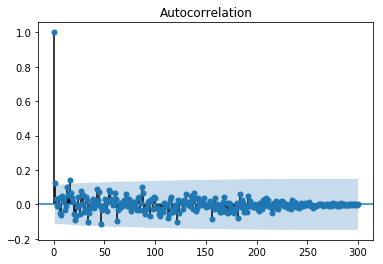

In [80]:
acf= smt.graphics.plot_acf(lin_reg.resid)
acf.show()

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


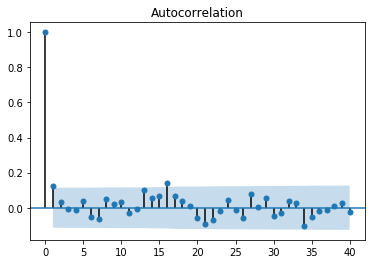

In [81]:
acf= smt.graphics.plot_acf(lin_reg.resid,lags=40)
acf.show()

In [82]:
from scipy import stats

In [83]:
stats.jarque_bera(lin_reg.resid) #left one is p value

(670.7002077462644, 0.0)

In [87]:
import statsmodels.api as sm

In [88]:
sm.stats.diagnostic.linear_rainbow(res=lin_reg)

(1.2572981093955329, 0.0841262039843735)

In [89]:
lin_reg.resid.mean()

2.4805997049741056e-12

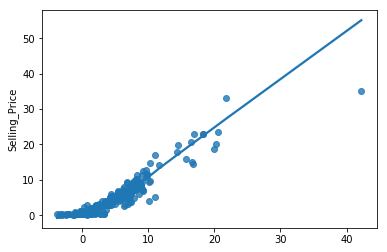

In [91]:
sns.regplot(x=lin_reg.predict(X_constant),y=y1,lowess=True)
plt.show()

* CHECKING FOR MULTI COLLINEARITY:

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
vif= [variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]

In [67]:
vif

[717762.6413405654,
 1.4729265427973819,
 1.7815118024931667,
 1.5120179537491365,
 1.323089269902909,
 1.4489646457506848,
 1.1959154251739208,
 1.0567101758203008]

In [85]:
df=DataFrame(vif,index=X_constant.columns,columns=['Vif'])
df

,Vif
const,717762.641341
Year,1.472927
Present_Price,1.781512
Kms_Driven,1.512018
Fuel_Type,1.323089
Seller_Type,1.448965
Transmission,1.195915
Owner,1.056710


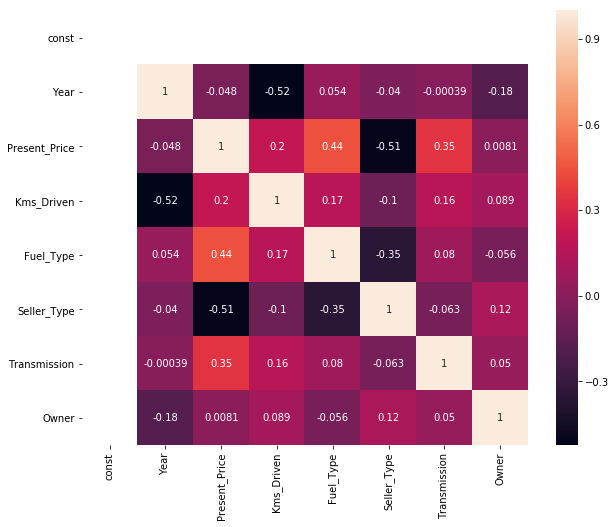

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(X_constant.corr(),annot=True)
plt.show()